## Optimization Methods:


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import sklearn
from sklearn.datasets import make_moons
import math
from init_utils import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


#### 1. Gradient Descent

a simple optimization technique

In [30]:
def update_parameters_with_gd(parameters, grads, lr):
    L = len(parameters) // 2 # number of layers in the neural networks

    for l in range(L):
        parameters['W' + str(l+1)] = parameters['W' + str(l+1)] - lr * grads['dW' + str(l+1)]
        parameters['b' + str(l+1)] = parameters['b' + str(l+1)] - lr * grads['db' + str(l+1)]

    return parameters


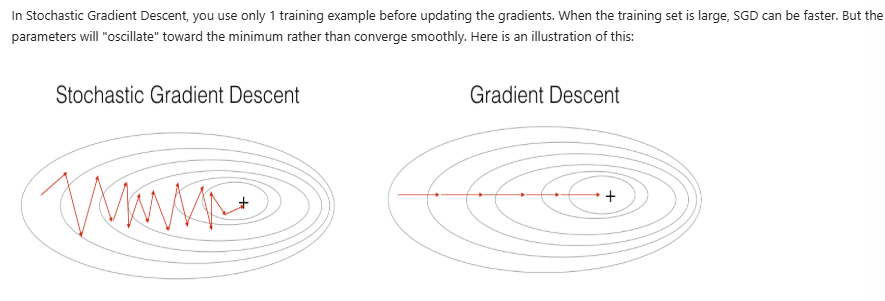

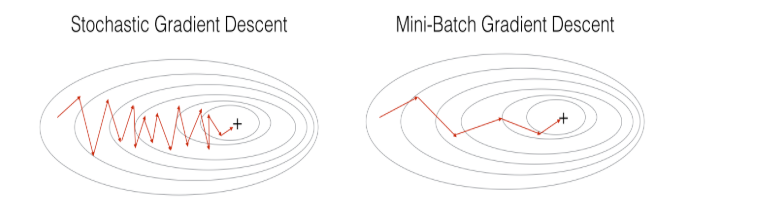

#### 2- Mini-Batch Gradient descent

In [31]:
def random_mini_batches(x, y, mini_batch_size=64, seed=0):
    np.random.seed(seed)
    m = x.shape[1]
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_x = x[:, permutation]
    shuffled_y = y[:, permutation].reshape((1, m))
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_x[:, k*mini_batch_size:(k+1)*mini_batch_size]
        mini_batch_Y = shuffled_y[:, k*mini_batch_size:(k+1)*mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    return mini_batches

#### 3. Momentum:

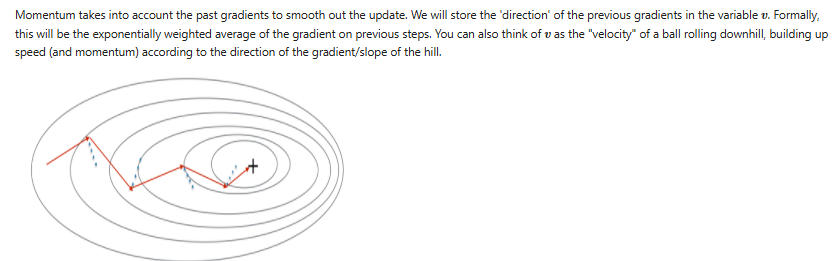

In [32]:
def initialize_velocity(parameters):
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}

    for l in range(L):
        v['dW' + str(l+1)] = np.zeros((parameters['W' + str(l+1)].shape))
        v['db' + str(l+1)] = np.zeros((parameters['b' + str(l+1)].shape))

    return v

implemented this:
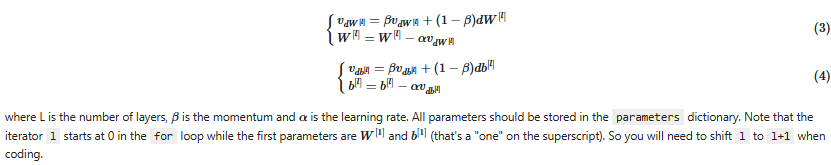

In [33]:
def update_parameters_with_momentum(parameters, grads, v, beta, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural networks
        
        # Momentum update for each parameter
    for l in range(L):

        v["dW" + str(l+1)] = beta*v["dW" + str(l+1)] + (1-beta)*grads["dW"+str(l+1)]
        v["db" + str(l+1)] = beta*v["db" + str(l+1)] + (1-beta)*grads["db"+str(l+1)]
        # update parameters
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*v["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*v["db" + str(l+1)]            
    
    return parameters, v

#### 4. Adam

- It combines ideas from RMSProp and Momentum

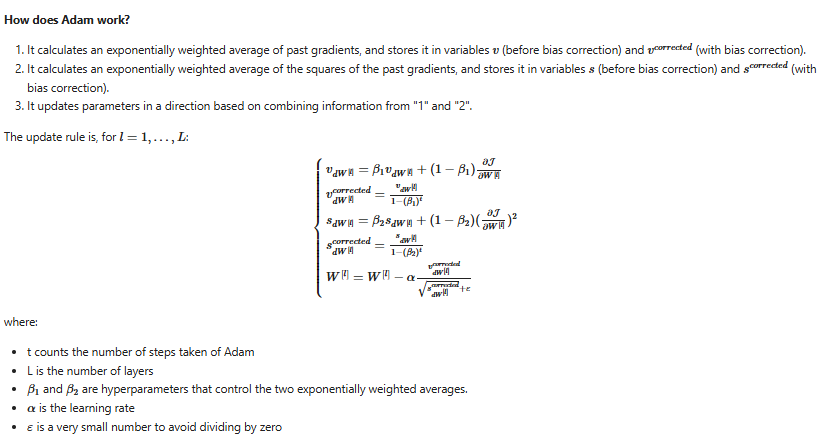

In [34]:
def initialize_adam(parameters) :
    L = len(parameters) // 2 # number of layers in the neural networks
    v = {}
    s = {}
    
    # Initialize v, s. Input: "parameters". Outputs: "v, s".
    for l in range(L):
    ### START CODE HERE ### (approx. 4 lines)
        v["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0], parameters["W"+str(l+1)].shape[1]))
        v["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0], parameters["b"+str(l+1)].shape[1]))
        s["dW" + str(l+1)] = np.zeros((parameters["W"+str(l+1)].shape[0], parameters["W"+str(l+1)].shape[1]))
        s["db" + str(l+1)] = np.zeros((parameters["b"+str(l+1)].shape[0], parameters["b"+str(l+1)].shape[1]))
    ### END CODE HERE ###
    
    return v, s

In [35]:
def update_parameters_with_adam(parameters, grads, v, s, t, learning_rate = 0.01,
                                beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8):
    
    L = len(parameters) // 2                 # number of layers in the neural networks
    v_corrected = {}                         # Initializing first moment estimate, python dictionary
    s_corrected = {}                         # Initializing second moment estimate, python dictionary
    
    # Perform Adam update on all parameters
    for l in range(L):
        # Moving average of the gradients. Inputs: "v, grads, beta1". Output: "v".
        ### START CODE HERE ### (approx. 2 lines)
        v["dW" + str(l+1)] = beta1*v["dW" + str(l+1)] + (1-beta1)*grads["dW"+str(l+1)]
        v["db" + str(l+1)] = beta1*v["db" + str(l+1)] + (1-beta1)*grads["db"+str(l+1)]
        ### END CODE HERE ###

        # Compute bias-corrected first moment estimate. Inputs: "v, beta1, t". Output: "v_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        v_corrected["dW" + str(l+1)] = v["dW" + str(l+1)] / (1-beta1**t)
        v_corrected["db" + str(l+1)] = v["db" + str(l+1)] / (1-beta1**t)
        ### END CODE HERE ###

        # Moving average of the squared gradients. Inputs: "s, grads, beta2". Output: "s".
        ### START CODE HERE ### (approx. 2 lines)
        s["dW" + str(l+1)] = beta2*s["dW" + str(l+1)] + (1-beta2)*(grads["dW"+str(l+1)]**2)
        s["db" + str(l+1)] = beta2*s["db" + str(l+1)] + (1-beta2)*(grads["db"+str(l+1)]**2)
        ### END CODE HERE ###

        # Compute bias-corrected second raw moment estimate. Inputs: "s, beta2, t". Output: "s_corrected".
        ### START CODE HERE ### (approx. 2 lines)
        s_corrected["dW" + str(l+1)] = s["dW" + str(l+1)] / (1-beta2**t)
        s_corrected["db" + str(l+1)] = s["db" + str(l+1)] / (1-beta2**t)
        ### END CODE HERE ###

        # Update parameters. Inputs: "parameters, learning_rate, v_corrected, s_corrected, epsilon". Output: "parameters".
        ### START CODE HERE ### (approx. 2 lines)
        tempW = v_corrected["dW" + str(l+1)]/(s_corrected["dW" + str(l+1)]**0.5 + epsilon)
        tempB = v_corrected["db" + str(l+1)]/(s_corrected["db" + str(l+1)]**0.5 + epsilon)
        
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*tempW
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*tempB
        ### END CODE HERE ###

    return parameters, v, s

In [36]:
def load_dataset(seed=3):
    """
    Generates a 2D dataset for binary classification.
    Returns train and test sets: train_X, train_Y, test_X, test_Y
    """
    np.random.seed(seed)
    
    # Generate 2D data: X shape (2, number of examples), Y shape (1, number of examples)
    X, Y = make_moons(n_samples=400, noise=0.2, random_state=seed)
    
    # Transpose to match expected shapes
    X = X.T
    Y = Y.reshape(1, Y.shape[0])
    
    # Split into train and test sets
    train_X = X[:, :]
    train_Y = Y[:, :]
    
    return train_X, train_Y

#### 5. Model with different optimization algorithms.

In [38]:
train_X, train_Y = load_dataset()

In [39]:
def model(X, Y, layers_dims, optimizer, learning_rate = 0.0007, mini_batch_size = 64, beta = 0.9,
          beta1 = 0.9, beta2 = 0.999,  epsilon = 1e-8, num_epochs = 10000, print_cost = True):
    L = len(layers_dims)             # number of layers in the neural networks
    costs = []                       # to keep track of the cost
    t = 0                            # initializing the counter required for Adam update
    seed = 10                        # For grading purposes, so that your "random" minibatches are the same as ours
    m = X.shape[1]                   # number of training examples
    
    # Initialize parameters
    parameters = initialize(layers_dims)

    # Initialize the optimizer
    if optimizer == "gd":
        pass # no initialization required for gradient descent
    elif optimizer == "momentum":
        v = initialize_velocity(parameters)
    elif optimizer == "adam":
        v, s = initialize_adam(parameters)
    
    # Optimization loop
    for i in range(num_epochs):
        
        # Define the random minibatches. We increment the seed to reshuffle differently the dataset after each epoch
        seed = seed + 1
        minibatches = random_mini_batches(X, Y, mini_batch_size, seed)
        cost_total = 0
        
        for minibatch in minibatches:

            # Select a minibatch
            (minibatch_X, minibatch_Y) = minibatch

            # Forward propagation
            a3, caches = forward_propagation(minibatch_X, parameters)

            # Compute cost and add to the cost total
            cost_total += compute_loss(a3, minibatch_Y)

            # Backward propagation
            grads = backward_propagation(minibatch_X, minibatch_Y, caches, parameters)

            # Update parameters
            if optimizer == "gd":
                parameters = update_parameters_with_gd(parameters, grads, learning_rate)
            elif optimizer == "momentum":
                parameters, v = update_parameters_with_momentum(parameters, grads, v, beta, learning_rate)
            elif optimizer == "adam":
                t = t + 1 # Adam counter
                parameters, v, s = update_parameters_with_adam(parameters, grads, v, s,
                                                               t, learning_rate, beta1, beta2,  epsilon)
        cost_avg = cost_total / m
        
        # Print the cost every 1000 epoch
        if print_cost and i % 1000 == 0:
            print ("Cost after epoch %i: %f" %(i, cost_avg))
        if print_cost and i % 100 == 0:
            costs.append(cost_avg)
                
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('epochs (per 100)')
    plt.title("Learning rate = " + str(learning_rate))
    plt.show()

    return parameters

#### 5.1 - Mini-batch Gradient descent

Cost after epoch 0: 0.010663
Cost after epoch 1000: 0.009917
Cost after epoch 2000: 0.009191
Cost after epoch 3000: 0.008530
Cost after epoch 4000: 0.008088
Cost after epoch 5000: 0.007745
Cost after epoch 6000: 0.007315
Cost after epoch 7000: 0.007178
Cost after epoch 8000: 0.006748
Cost after epoch 9000: 0.006018


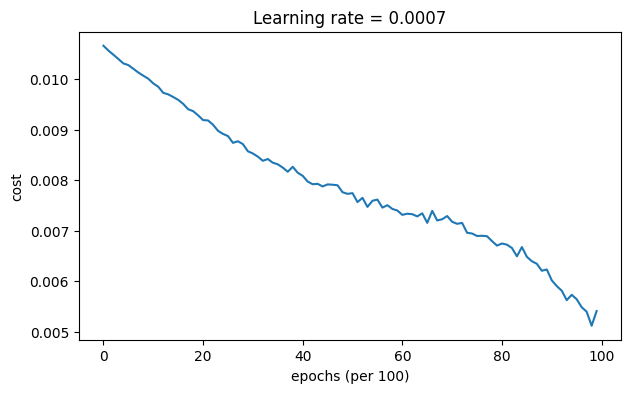

Accuracy be: 88.0%


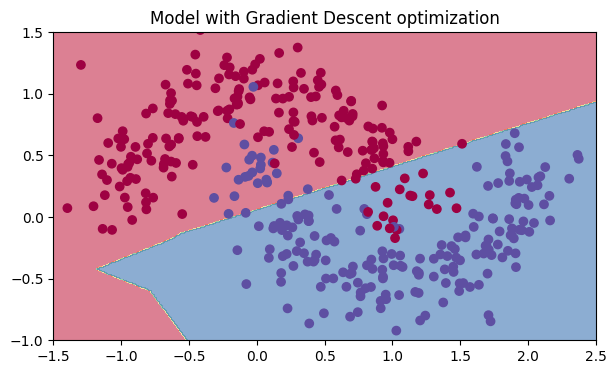

In [ ]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "gd")

# Predict
predictions = predict(train_X, parameters)
print("Accuracy be: " + str(np.mean(predictions == train_Y) * 100) + "%")

# Plot decision boundary
plt.title("Model with Gradient Descent optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.50])
axes.set_ylim([-1.0,1.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_X, train_Y)

#### 5.2 - Mini-batch gradient descent with momentum

Cost after epoch 0: 0.010663
Cost after epoch 1000: 0.009918
Cost after epoch 2000: 0.009193
Cost after epoch 3000: 0.008531
Cost after epoch 4000: 0.008089
Cost after epoch 5000: 0.007746
Cost after epoch 6000: 0.007317
Cost after epoch 7000: 0.007179
Cost after epoch 8000: 0.006750
Cost after epoch 9000: 0.006027


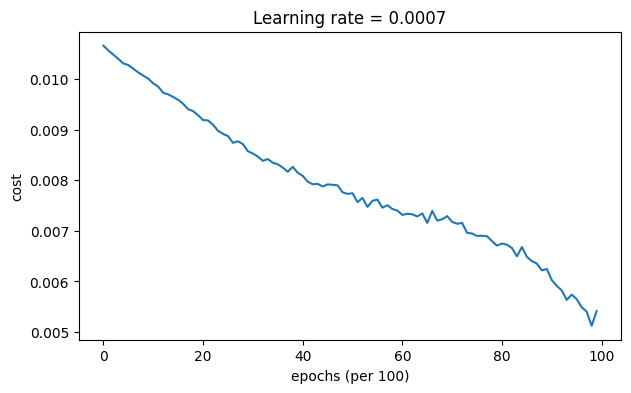

Accuracy be: 88.0%


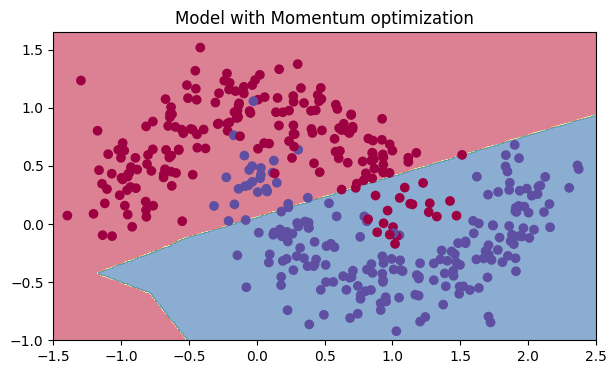

In [42]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, beta = 0.9, optimizer = "momentum")

# Predict
predictions = predict(train_X, parameters)
print("Accuracy be: " + str(np.mean(predictions == train_Y) * 100) + "%")

# Plot decision boundary
plt.title("Model with Momentum optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.50])
axes.set_ylim([-1.0,1.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_X, train_Y)

#### 5.3 - Mini-batch with Adam mode

Cost after epoch 0: 0.010655
Cost after epoch 1000: 0.001641
Cost after epoch 2000: 0.001281
Cost after epoch 3000: 0.001178
Cost after epoch 4000: 0.001130
Cost after epoch 5000: 0.001068
Cost after epoch 6000: 0.001039
Cost after epoch 7000: 0.001051
Cost after epoch 8000: 0.001091
Cost after epoch 9000: 0.001055


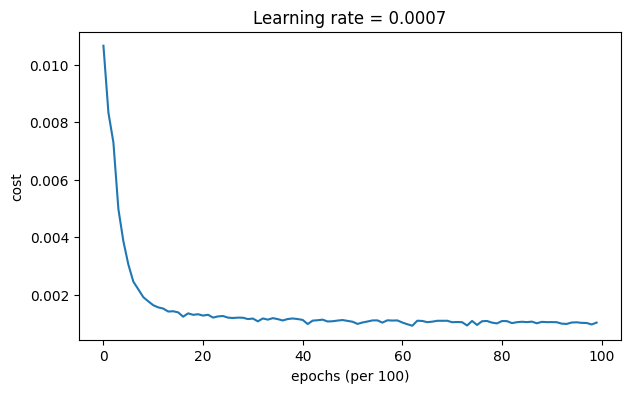

Accuracy be: 97.0%


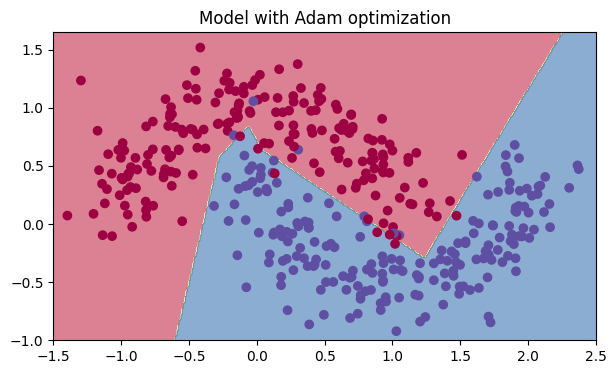

In [44]:
# train 3-layer model
layers_dims = [train_X.shape[0], 5, 2, 1]
parameters = model(train_X, train_Y, layers_dims, optimizer = "adam")

# Predict
predictions = predict(train_X, parameters)
print("Accuracy be: " + str(np.mean(predictions == train_Y) * 100) + "%")

# Plot decision boundary
plt.title("Model with Adam optimization")
axes = plt.gca()
axes.set_xlim([-1.5,2.50])
axes.set_ylim([-1.0,1.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x), train_X, train_Y)

Conclusion:

Momentum usually helps, but given the small learning rate and the simplistic dataset, its impact is almost negligeable. Also, the huge oscillations you see in the cost come from the fact that some minibatches are more difficult thans others for the optimization algorithm.

Adam on the other hand, clearly outperforms mini-batch gradient descent and Momentum. If you run the model for more epochs on this simple dataset, all three methods will lead to very good results. However, you've seen that Adam converges a lot faster.

Some advantages of Adam include:

Relatively low memory requirements (though higher than gradient descent and gradient descent with momentum)
Usually works well even with little tuning of hyperparameters (except 
α
)

References:

Adam paper: https://arxiv.org/pdf/1412.6980.pdf